In [39]:
#Data Challenge 
#Date: December 10, 2025
#Author: Hiba Ali 
#E-mail: hiba.ali.26@dartmouth.edu

#Objectives:
#1. Where should we deploy a food access program?
#2. How many people will be included? How many might be successfully engaged?
#3. Which subgroup of the population might benefit the most from the program?
#4. What is the projected impact of this program?

In [40]:
#Import libraries
import pandas as pd 
import sqlite3
import os

#Path to database from the data folder
connection = sqlite3.connect(os.path.join('..', 'data', 'challenge.db'))

#See the table names 
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", connection)
print(tables)

                  name
0  five_hundred_cities
1               access
2        variable_list


In [41]:
#Names of the tables are five_hundred_cities, access, and variable_list

#Load the tables into dataframes
df_cities = pd.read_sql_query("SELECT * FROM five_hundred_cities;", connection)
df_cities.head()

,index,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,PAPTEST_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,...,"(83.4, 86.6)",20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)"
1,1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,...,"(81.9, 85.6)",22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)"
2,2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,...,"(82.3, 86.8)",19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)"
3,3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,...,"(82.1, 86.5)",21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)"
4,4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,...,"(82.2, 87.1)",25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)"


In [42]:
#Load the tables into dataframes
df_access = pd.read_sql_query("SELECT * FROM access;", connection)
df_access.head()

,index,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990


In [43]:
#Load the tables into dataframes
df_variables = pd.read_sql_query("SELECT * FROM variable_list;", connection)
df_variables

,index,Category Name,Category Code,Subcategory Name,Variable Name,Variable Code,Geography,Units
0,0,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2010",LACCESS_POP10,CNTY10,Count
1,1,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store, 2015",LACCESS_POP15,CNTY10,Count
2,2,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (% change), 20...",PCH_LACCESS_POP_10_15,CNTY10,% change
3,3,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2010",PCT_LACCESS_POP10,CNTY10,Percent
4,4,Access and Proximity to Grocery Store,ACCESS,Overall,"Population, low access to store (%), 2015",PCT_LACCESS_POP15,CNTY10,Percent
...,...,...,...,...,...,...,...,...
276,276,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Persistent-poverty counties, 2010",PERPOV10,CNTY10,Legend
277,277,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Child poverty rate, 2015",CHILDPOVRATE15,CNTY10,Percent
278,278,Socioeconomic Characteristics,SOCIOECONOMIC,Income Level,"Persistent-child-poverty counties, 2010",PERCHLDPOV10,CNTY10,Legend
279,279,Socioeconomic Characteristics,SOCIOECONOMIC,Other,"Metro/nonmetro counties, 2010",METRO13,CNTY10,Legend


In [44]:
#Renaming df_access columns for readability using df_variables
mapping = dict(zip(df_variables['Variable Code'], 
                   df_variables['Variable Name']))

df_access = df_access.rename(columns=mapping)

df_access.head()

,index,FIPS,State,County,"Population, low access to store, 2010","Population, low access to store, 2015","Population, low access to store (% change), 2010 -15","Population, low access to store (%), 2010","Population, low access to store (%), 2015","Low income & low access to store, 2010",...,"Hispanic ethnicity, low access to store, 2015","Hispanic ethnicity, low access to store (%), 2015","Asian, low access to store, 2015","Asian, low access to store (%), 2015","American Indian or Alaska Native, low access to store, 2015","American Indian or Alaska Native, low access to store (%), 2015","Hawaiian or Pacific Islander, low access to store, 2015","Hawaiian or Pacific Islander, low access to store (%), 2015","Multiracial, low access to store, 2015","Multiracial, low access to store (%), 2015"
0,0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990


In [45]:
#Merge the dataframes 

#I noticed for states AL-CT, a leading zero was missing for the FIPS codes in df_access
df_access['FIPS'] = df_access['FIPS'].astype(str).str.zfill(5)

#Extract county FIPS from Place_TractID in df_cities (using first 5 digits after the dash)
df_cities['CountyFIPS'] = df_cities['Place_TractID'].str.split('-').str[1].str[:5]

#Merge 
df = df_cities.merge(df_access, left_on='CountyFIPS', right_on='FIPS', how='left')
df.head()

,index_x,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,...,"Hispanic ethnicity, low access to store, 2015","Hispanic ethnicity, low access to store (%), 2015","Asian, low access to store, 2015","Asian, low access to store (%), 2015","American Indian or Alaska Native, low access to store, 2015","American Indian or Alaska Native, low access to store (%), 2015","Hawaiian or Pacific Islander, low access to store, 2015","Hawaiian or Pacific Islander, low access to store (%), 2015","Multiracial, low access to store, 2015","Multiracial, low access to store (%), 2015"
0,0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,...,7097.673679,1.07791,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462
1,1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,...,7097.673679,1.07791,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462
2,2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,...,7097.673679,1.07791,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462
3,3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,...,7097.673679,1.07791,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462
4,4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,...,7097.673679,1.07791,1808.048713,0.274585,476.945542,0.072433,80.060491,0.012159,6376.995723,0.968462


In [46]:
#check df columns
list(df.columns)

['index_x',
 'StateAbbr',
 'PlaceName',
 'PlaceFIPS',
 'TractFIPS',
 'Place_TractID',
 'Population2010',
 'ACCESS2_CrudePrev',
 'ACCESS2_Crude95CI',
 'ARTHRITIS_CrudePrev',
 'ARTHRITIS_Crude95CI',
 'BINGE_CrudePrev',
 'BINGE_Crude95CI',
 'BPHIGH_CrudePrev',
 'BPHIGH_Crude95CI',
 'BPMED_CrudePrev',
 'BPMED_Crude95CI',
 'CANCER_CrudePrev',
 'CANCER_Crude95CI',
 'CASTHMA_CrudePrev',
 'CASTHMA_Crude95CI',
 'CHD_CrudePrev',
 'CHD_Crude95CI',
 'CHECKUP_CrudePrev',
 'CHECKUP_Crude95CI',
 'CHOLSCREEN_CrudePrev',
 'CHOLSCREEN_Crude95CI',
 'COLON_SCREEN_CrudePrev',
 'COLON_SCREEN_Crude95CI',
 'COPD_CrudePrev',
 'COPD_Crude95CI',
 'COREM_CrudePrev',
 'COREM_Crude95CI',
 'COREW_CrudePrev',
 'COREW_Crude95CI',
 'CSMOKING_CrudePrev',
 'CSMOKING_Crude95CI',
 'DENTAL_CrudePrev',
 'DENTAL_Crude95CI',
 'DIABETES_CrudePrev',
 'DIABETES_Crude95CI',
 'HIGHCHOL_CrudePrev',
 'HIGHCHOL_Crude95CI',
 'KIDNEY_CrudePrev',
 'KIDNEY_Crude95CI',
 'LPA_CrudePrev',
 'LPA_Crude95CI',
 'MAMMOUSE_CrudePrev',
 'MAMMOUSE_C

In [47]:
#Guiding Question 1: Where should we deploy a food access program?

#Since our client is a national Medicare Advantage plan who is seeking to deploy a food access program, I first researched what exactly 
#this food access program would entail. From this research, I learned that participants would be provided with a food allowance card
#and they are able to use it at participating locations. Restrictions apply, as the main goal of the card is to encourage participants 
#to purchase healthy foods. Participants who are eligible for this program are typically either on a chronic condition special needs plan
#(C-SNP) or a dual speacial needs plan (D-SNP). C-SNP offers benefits to those managing certain chronic conditions, and D-SNP is for those 
#who have both Medicare and Medicaid. 

#Source: https://www.healthline.com/health/medicare/medicare-grocery-allowance

#Also according to this source, those who qualify for C-SNP may have the following chronic conditions: alcohol/substance use disorder, 
#certain autoimmune disorders, cancer, certain cardiovascular disorders, heart failure, dementia, diabetes, end stage liver disease, 
#end stage renal disease, certain blood disorders including hemophilia and sickle cell disease, certain mental health conditions including
#bipolar disorder and schizophrenia, certain neurological disorders, and stroke

#Given this context, I lay out my approach in the following way: 

#First, using the list of chronic conditions, I will create a "Chronic Condition Score" by averaging those columns

chronic_cols = ['CANCER_CrudePrev', 'CHD_CrudePrev', 'BPHIGH_CrudePrev', 'DIABETES_CrudePrev', 'KIDNEY_CrudePrev', 'STROKE_CrudePrev',
                'COPD_CrudePrev', 'MHLTH_CrudePrev', 'BINGE_CrudePrev', 'ARTHRITIS_CrudePrev']

df = df.dropna(subset=chronic_cols, how='all') #drop na values

df['chronic_cols_score'] = df[chronic_cols].mean(axis=1)

#This score represents the average prevalence of chronic conditions that make individuals eligible for C-SNP plans. A higher chronic disease
#score would mean a higher need for medical and food support.

#Next, I will create a "Food Access Risk Score" by averaging the columns that relate to D-SNP needs.

access_cols = [
    'Population, low access to store (%), 2015',
    'Low income & low access to store (%), 2015',
    'Households, no car & low access to store (%), 2015',
    'SNAP households, low access to store (%), 2015',
    'Children, low access to store (%), 2015', 
    'Seniors, low access to store (%), 2015',
    #race and ethnicity groups- I am including this to ensure the access score identifies areas with the greatest equity gaps 
    'White, low access to store (%), 2015',
    'Black, low access to store (%), 2015',
    'Hispanic ethnicity, low access to store (%), 2015',
    'Asian, low access to store (%), 2015',
    'American Indian or Alaska Native, low access to store (%), 2015',
    'Hawaiian or Pacific Islander, low access to store (%), 2015',
    'Multiracial, low access to store (%), 2015']

df = df.dropna(subset=access_cols, how='all')

df['food_access_score'] = df[access_cols].mean(axis=1)

#Next, I will create a "Trend Risk Score" to identify areas that have experienced the largest worsening in food access over time.
#This helps capture emerging risks. 

trend_cols = ['Population, low access to store (% change), 2010 -15', 
              'Low income & low access to store (% change), 2010 - 15',
              'Households, no car & low access to store (% change), 2010 - 15', 
              'LACCESS_CHILD_10_15', 'Seniors, low access to store (% change), 2010 -15']

df = df.dropna(subset=trend_cols, how='all')

df['trend_risk_score'] = df[trend_cols].mean(axis=1)

#Because each component is on a different scale, I will normalize each component before averaging using min-max scaling. 

df['chronic_norm'] = (df['chronic_cols_score'] - df['chronic_cols_score'].min()) / (df['chronic_cols_score'].max() - df['chronic_cols_score'].min())
df['food_access_norm'] = (df['food_access_score'] - df['food_access_score'].min()) / (df['food_access_score'].max() - df['food_access_score'].min())
df['trend_norm'] = (df['trend_risk_score'] - df['trend_risk_score'].min()) / (df['trend_risk_score'].max() - df['trend_risk_score'].min())

#Now, I will create a combined "Overall Need Score". This is assuming that all three components will be weighted equally, but realistically, 
#this may not be the case. We can weigh each component differently based on what our client would like to see. 

df['overall_need_score'] = df[['chronic_norm', 'food_access_norm', 'trend_norm']].mean(axis=1)

df = df.sort_values('overall_need_score', ascending=False)

df[['PlaceName','County','State','Place_TractID','overall_need_score','chronic_cols_score','food_access_score','trend_risk_score']].head(10)

,PlaceName,County,State,Place_TractID,overall_need_score,chronic_cols_score,food_access_score,trend_risk_score
22062,Chattanooga,Hamilton,TN,4714000-47065001600,0.701516,23.18,9.416183,8.215708
25477,Waco,McLennan,TX,4876000-48309001600,0.694939,17.73,10.255407,33.345601
9354,Augusta,Richmond,GA,1304204-13245001500,0.694205,18.73,9.479903,37.191227
9389,Augusta,Richmond,GA,1304204-13245011000,0.690924,18.50,9.479903,37.191227
9366,Augusta,Richmond,GA,1304204-13245010400,0.683932,18.01,9.479903,37.191227
25102,San Angelo,Tom Green,TX,4864472-48451001704,0.683561,16.94,10.287571,32.798534
25475,Waco,McLennan,TX,4876000-48309001400,0.679528,16.65,10.255407,33.345601
25485,Waco,McLennan,TX,4876000-48309002503,0.678672,16.59,10.255407,33.345601
9353,Augusta,Richmond,GA,1304204-13245001400,0.677796,17.58,9.479903,37.191227
25478,Waco,McLennan,TX,4876000-48309001700,0.675533,16.37,10.255407,33.345601


In [99]:
#The table above assumes that the three components are weighed equally. Since the food access program mainly focuses on those with chronic 
#conditions or those on Medicare and Medicaid, I will now weigh those two components equally, while the Trend Risk Score will be weighed
#slightly less. 

df['weighted_overall_score'] = (
    df['chronic_norm'] * 0.4 +
    df['food_access_norm'] * 0.4 +
    df['trend_norm'] * 0.2
)

df = df.sort_values('weighted_overall_score', ascending=False)

top_10 = df[['PlaceName','County','State','Place_TractID','weighted_overall_score','chronic_cols_score','food_access_score','trend_risk_score', 'Population2010', 'trend_norm']].head(10)
top_10

,PlaceName,County,State,Place_TractID,weighted_overall_score,chronic_cols_score,food_access_score,trend_risk_score,Population2010,trend_norm
22062,Chattanooga,Hamilton,TN,4714000-47065001600,0.738936,23.18,9.416183,8.215708,2481,0.514413
25477,Waco,McLennan,TX,4876000-48309001600,0.702755,17.73,10.255407,33.345601,96,0.655857
9354,Augusta,Richmond,GA,1304204-13245001500,0.697546,18.73,9.479903,37.191227,989,0.677502
9389,Augusta,Richmond,GA,1304204-13245011000,0.693608,18.50,9.479903,37.191227,1668,0.677502
25102,San Angelo,Tom Green,TX,4864472-48451001704,0.689718,16.94,10.287571,32.798534,841,0.652778
24781,McAllen,Hidalgo,TX,4845384-48215024105,0.688636,17.64,11.634792,-19.954948,64,0.355853
9366,Augusta,Richmond,GA,1304204-13245010400,0.685217,18.01,9.479903,37.191227,3645,0.677502
25475,Waco,McLennan,TX,4876000-48309001400,0.684262,16.65,10.255407,33.345601,6220,0.655857
25485,Waco,McLennan,TX,4876000-48309002503,0.683235,16.59,10.255407,33.345601,1192,0.655857
25478,Waco,McLennan,TX,4876000-48309001700,0.679468,16.37,10.255407,33.345601,114,0.655857


In [49]:
#Compare to averages to ensure the data above is accurate 
avgs = df[['weighted_overall_score','chronic_cols_score','food_access_score','trend_risk_score']].mean()
avgs

#According to the American Public Health Association, USDA FNS programs serve about one in four Americans. My analysis shows a 33% overall 
#need score for a Medicaid-based food access program, and because these populations likely overlap, this estimate is still very close to the 
#true level of need.

#Source: https://www.apha.org/getcontentasset/6f04791d-d297-4bfb-a03d-f1b32b822648/7ca0dc9d-611d-46e2-9fd3-26a4c03ddcbb/food_access_programs_report.pdf?language=en#:~:text=In%202022%2C%2049%20million%20people,recognizing%20the%20structural%20inequities%20that

weighted_overall_score     0.335050
chronic_cols_score        11.887218
food_access_score          3.734754
trend_risk_score          -5.278731
dtype: float64

In [50]:
#Conclusion for Guiding Question #1: 

#Based on the prevalence of chronic conditions, current food access risk, and worsening food access trends, this analysis identifies 
#neighborhoods for potential deployment of a food access program. Across both the equal-weight and weighted scoring approaches, a few 
#geographic patterns emerge: 

#Chattanooga, TN, appears as the highest-need tract. Multiple tracts within Augusta, GA and Waco, TX also rank near the top of the 
#distribution. This clustering does not mean the data is duplicated; rather, it shows that while food access and trend indicators are 
#available only at the county level, chronic condition prevalence varies by neighborhood. These within-county differences cause several 
#Augusta and Waco neighborhoods to score high independently. San Angelo, TX also appears in both the equal-weight and weighted scoring approaches.

#Overall, the results point toward specific neighborhoods within a handful of counties. These tracts/neighborhoods combine high chronic 
#disease burden with barriers to food access, making them likely to benefit from a grocery allowance program.

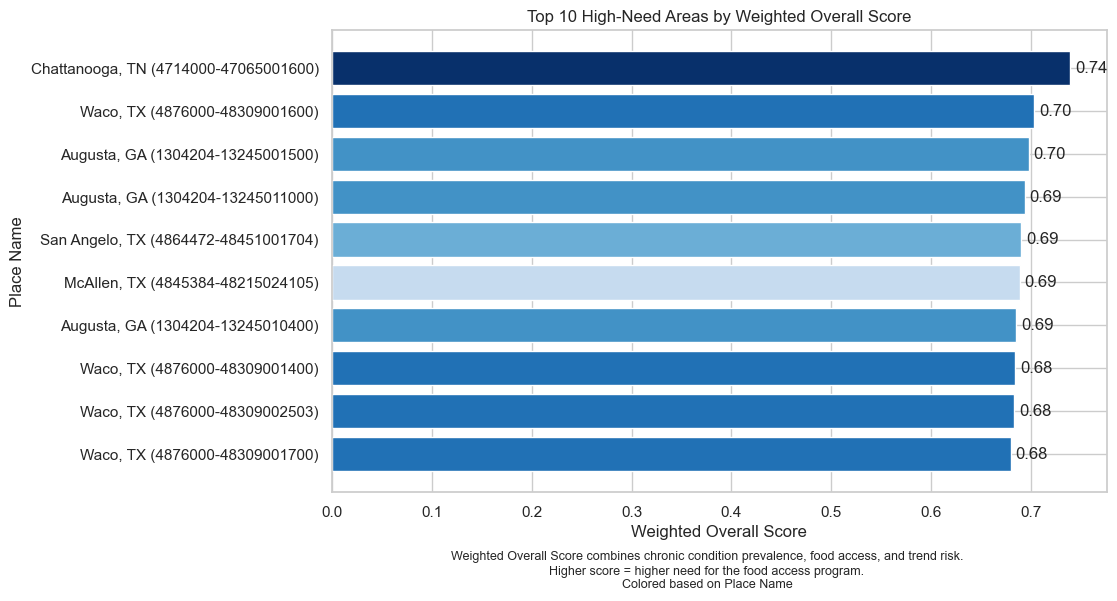

In [234]:
#Visualization for Guiding Question #1

import matplotlib.pyplot as plt
import seaborn as sns

#Make labels combining PlaceName, State, TractID
top_10['label'] = top_10['PlaceName'] + ', ' + top_10['State'] + ' ('+ top_10['Place_TractID'] +')'

#Define unique colors for each PlaceName
place_colors = {
    'Chattanooga': '#08306B', 
    'Waco': '#2171B5',         
    'Augusta': '#4292C6',     
    'San Angelo': '#6BAED6',   
    'McAllen': '#C6DBEF'       
}

#Map each row to its PlaceName color
bar_colors = top_10['PlaceName'].map(place_colors)

plt.figure(figsize=(10,6))

#Horizontal bar chart
bars = plt.barh(top_10['label'], top_10['weighted_overall_score'], color=bar_colors)

#Add score label at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f"{width:.2f}", va='center')

plt.xlabel('Weighted Overall Score')
plt.ylabel('Place Name')
plt.title('Top 10 High-Need Areas by Weighted Overall Score')

#Add caption under the chart
plt.figtext(0.5, -0.05, 
            'Weighted Overall Score combines chronic condition prevalence, food access, and trend risk.\n'
            'Higher score = higher need for the food access program.\n'
            'Colored based on Place Name', 
            ha='center', fontsize=9)

plt.show()

In [51]:
#Guiding Question #2: How many people will be included? How many might be successfully engaged?

#We will be using the 'Population2010' variable from the dataframe. This is a limitation, since the other variables we have been using for 
#our analysis are from 2015, so this population variable from 2010 may not provide a completely accurate estimate. 

#Total population living in the top 10 highest need areas
population_top10 = top_10['Population2010'].sum()

#This prints 17310

#Now, we will estimate how many people qualify for the food access program based on this population. 

#Estimate the enagaged populaton for each tract using the weighted_overall_score 
estimated_engaged = (top_10['Population2010'] * top_10['weighted_overall_score']).sum()

#This prints roughly 12017. This means that roughly 12017 people qualify for the food access program within the top 10 tracts with the highest needs.
#This is about 70% of the total population.

#Now, we will estimate how many people will utilize the food access program based on the population that qualify for the food access program. \

#According to the United States Department of Agriculture, "An estimated 83 percent of eligible people received SNAP benefits in fiscal 
#year 2015 (1)." While this is just an estimate for my analysis, since my eligible population includes people beyond SNAP, SNAP accounts for 
#71% of all federal food program funding in 2015 (2), so I use this statistic as a reasonable approximation of expected utilization.

#Source (1): https://fns-prod.azureedge.us/sites/default/files/ops/Reaching2015.pdf

#Source (2): https://ers.usda.gov/sites/default/files/_laserfiche/publications/44059/56936_eib150_report-summary.pdf

estimated_utilizers = estimated_engaged * 0.83


print('Total Population in Top 10 High-Need Areas:', population_top10)
print('Estimated Number of People who Qualify for Program:', estimated_engaged)
print('Estimated Number of People who will Utilize the Program', estimated_utilizers)

#The estimated number of people who will engage with the program in the top 10 highest-need areas is roughly 56.7% of the total population
#of the top 10 highest-need areas

Total Population in Top 10 High-Need Areas: 17310
Estimated Number of People who Qualify for Program: 12017.305360549903
Estimated Number of People who will Utilize the Program 9974.363449256418


In [75]:
#Guiding Question #3: Which subgroup of the population might benefit the most from the program?

#Assuming we are using weighted_overall_score as the final score

#Now, we will examine which demographic groups show the highest need in the previously calculated high-scoring locations. For this approach, 
#I will use the columns that relate to demographic information. 

demographic_cols = ['SNAP households, low access to store (%), 2015',
    'Children, low access to store (%), 2015',
    'Seniors, low access to store (%), 2015',
    'White, low access to store (%), 2015',
    'Black, low access to store (%), 2015',
    'Hispanic ethnicity, low access to store (%), 2015',
    'Asian, low access to store (%), 2015',
    'American Indian or Alaska Native, low access to store (%), 2015',
    'Hawaiian or Pacific Islander, low access to store (%), 2015',
    'Multiracial, low access to store (%), 2015']

#Compare the averages in the high-need areas to the population average. Then, calculate the scale to show how much more (or less) a demographic group is affected in 
#high need areas compared to the population average:

comparison = pd.DataFrame({
    'Top 10 Areas With High Need Average': df.head(10)[demographic_cols].mean(),
    'Population Average': df[demographic_cols].mean(), 
    'Scale': df.head(10)[demographic_cols].mean() / df[demographic_cols].mean()
})

comparison.sort_values('Scale', ascending=False)

,Top 10 Areas With High Need Average,Population Average,Scale
"Black, low access to store (%), 2015",11.057823,2.545387,4.344259
"SNAP households, low access to store (%), 2015",7.154326,1.786871,4.003828
"Hispanic ethnicity, low access to store (%), 2015",9.319388,2.610233,3.570328
"Multiracial, low access to store (%), 2015",3.666669,1.354853,2.706323
"Children, low access to store (%), 2015",9.843425,4.057104,2.426220
"Seniors, low access to store (%), 2015",4.291383,1.914047,2.242047
"White, low access to store (%), 2015",23.495028,11.306495,2.078012
"Hawaiian or Pacific Islander, low access to store (%), 2015",0.046214,0.023066,2.003616
"American Indian or Alaska Native, low access to store (%), 2015",0.199797,0.129757,1.539777
"Asian, low access to store (%), 2015",0.615076,0.705447,0.871895


In [53]:
#Conclusion for Guiding Question #3: 

#The table above shows that the top 10 high-need areas have higher food access challenges among certain demographic groups compared to the 
#population average. In particular, Black individuals in the top 10 high-need areas experience 4.3x higher rates of low food access than the 
#overall population, followed by SNAP households (4.0x), and Hispanic individuals (3.6x). 

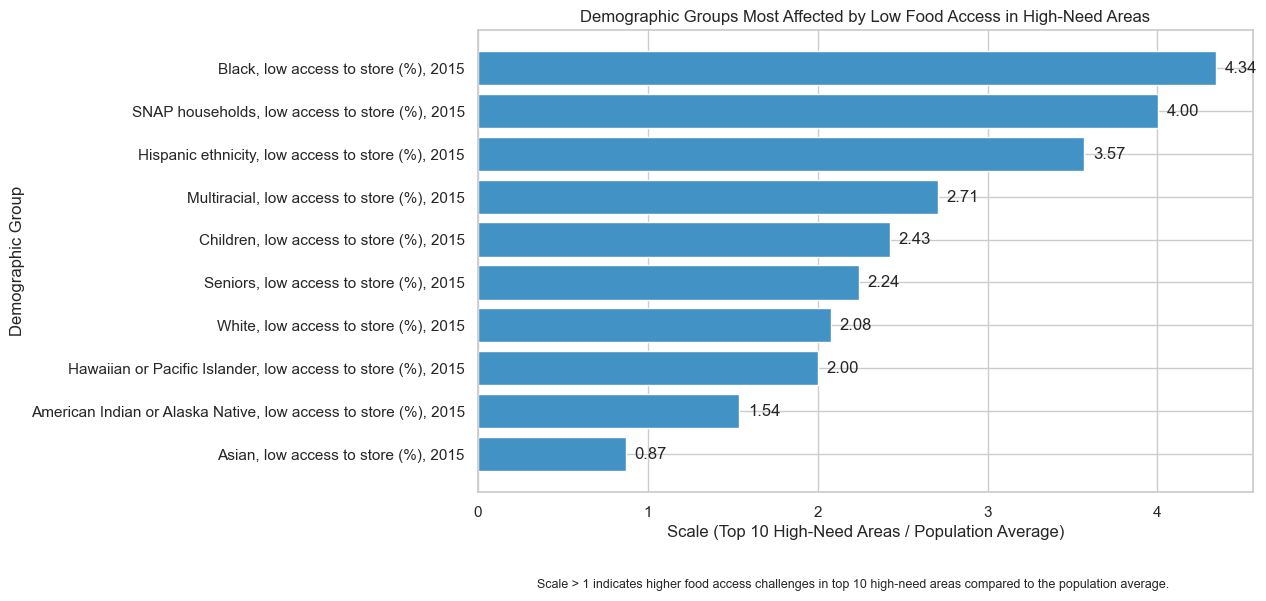

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

comparison = comparison.sort_values('Scale', ascending=True)

plt.figure(figsize=(10,6))

#Horizontal bar chart
bars = plt.barh(comparison.index, comparison['Scale'], color='#4292C6'
)

#Add score label at the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, f"{width:.2f}", va='center')

plt.xlabel('Scale (Top 10 High-Need Areas / Population Average)')
plt.ylabel('Demographic Group')
plt.title('Demographic Groups Most Affected by Low Food Access in High-Need Areas')

#Add caption
plt.figtext(0.5, -0.05, 'Scale > 1 indicates higher food access challenges in top 10 high-need areas compared to the population average.', ha='center', fontsize=9, wrap=True)

plt.show()

In [103]:
#Guiding Question #4: What is the projected impact of this program?

#Since SNAP is the largest federally funded food program in the U.S., and that many individuals eligible for C-SNP or D-SNP may also be 
#income-eligible for SNAP, and because we identified SNAP households to have one of the highest needs compared to other subgroups,
#it is reasonable to apply SNAP-based effect sizes to project the potential impaact of the proposed food program. Previous studies from 
#2015 show that SNAP participation reduces food insecurity by up to 30% (1), and SNAP participants report
#significantly better health outcomes than eligible non-participants, being 10.6% more likely to rate their health as excellent and 3.9% 
#more likely to report very good health. 

#Source (1): https://www.apha.org/getcontentasset/6f04791d-d297-4bfb-a03d-f1b32b822648/7ca0dc9d-611d-46e2-9fd3-26a4c03ddcbb/food_access_programs_report.pdf?language=en#:~:text=In%202022%2C%2049%20million%20people,recognizing%20the%20structural%20inequities%20that
#Source (2): https://www.cbpp.org/research/food-assistance/snap-is-linked-with-improved-health-outcomes-and-lower-health-care-costs


In [109]:
#Guiding Question #4: 

impact_df = top_10.copy()

#Since 10.6% of SNAP participants reported excellent health outcomes and 3.9% reported very good health, a reasonable estimate for those using
#the food access program would be ~5% reporting good health outcomes. Since SNAP participation reduces food security up to 30%, a reasonable
#estimate for this program (since it's not exactly SNAP) would be a 20% improvement. We don't have data on the "Trend Risk Score", so we will
#leave that unchanged.
impact_df['chronic_improved'] = impact_df['chronic_cols_score'] * (1 - 0.05)
impact_df['foodaccess_improved'] = impact_df['food_access_score'] * (1 - 0.20)

#Normalize improved values
impact_df['chronic_norm_improved'] = ((impact_df['chronic_improved'] - df['chronic_cols_score'].min()) / (df['chronic_cols_score'].max() - df['chronic_cols_score'].min()))

impact_df['foodaccess_norm_improved'] = ((impact_df['foodaccess_improved'] - df['food_access_score'].min()) /(df['food_access_score'].max() - df['food_access_score'].min()))

impact_df['trend_norm_improved'] = impact_df['trend_norm']

#Calculate the improved weighted score, using the same weights as before
impact_df['weighted_overall_score_improved'] = (
    impact_df['chronic_norm_improved'] * 0.4 +
    impact_df['foodaccess_norm_improved'] * 0.4 +
    impact_df['trend_norm_improved'] * 0.2
)

#Final comparison
impact_comparison = impact_df[['PlaceName','County','State', 'Place_TractID', 'weighted_overall_score','weighted_overall_score_improved','Population2010']]

impact_comparison['Score_Reduction'] = (impact_comparison['weighted_overall_score'] - impact_comparison['weighted_overall_score_improved'])

impact_comparison

/var/folders/8n/77bk6n_13svf1p2vh3dk7f8m0000gn/T/ipykernel_14568/1933546509.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impact_comparison['Score_Reduction'] = (impact_comparison['weighted_overall_score'] - impact_comparison['weighted_overall_score_improved'])


,PlaceName,County,State,Place_TractID,weighted_overall_score,weighted_overall_score_improved,Population2010,Score_Reduction
22062,Chattanooga,Hamilton,TN,4714000-47065001600,0.738936,0.654345,2481,0.084591
25477,Waco,McLennan,TX,4876000-48309001600,0.702755,0.617060,96,0.085695
9354,Augusta,Richmond,GA,1304204-13245001500,0.697546,0.616327,989,0.081219
9389,Augusta,Richmond,GA,1304204-13245011000,0.693608,0.612586,1668,0.081022
25102,San Angelo,Tom Green,TX,4864472-48451001704,0.689718,0.604478,841,0.085240
24781,McAllen,Hidalgo,TX,4845384-48215024105,0.688636,0.593533,64,0.095103
9366,Augusta,Richmond,GA,1304204-13245010400,0.685217,0.604615,3645,0.080603
25475,Waco,McLennan,TX,4876000-48309001400,0.684262,0.599492,6220,0.084771
25485,Waco,McLennan,TX,4876000-48309002503,0.683235,0.598516,1192,0.084719
25478,Waco,McLennan,TX,4876000-48309001700,0.679468,0.594937,114,0.084531


In [115]:
#Calculate the absolute and relative reductions in need
total_need_reduction = (impact_comparison['Population2010'] * (impact_comparison['weighted_overall_score'] - impact_comparison['weighted_overall_score_improved'])).sum()

total_need_reduction, total_need_reduction / impact_comparison['Population2010'].sum()

#This prints (1443.0343272604625, 0.08336420145929882)
#This means that the program is projected to reduce the overall need  to 1,443 people across the top 10 high-need tracts, 
#corresponding to an 8.3% reduction in total need.

(1443.0343272604625, 0.08336420145929882)

In [ ]:
#Conclusion for Guiding Question #4: 

#All top 10 tracts are projected to see improvements in the weighted overall score, but the magnitude of improvement differs across tracts. 
#Some areas, like McAllen and Waco in Texas, are projected to have relatively larger gains compared to  Augusta tracts (which dominated before),
#suggesting the program could have the most immediate impact in certain high-need locations. Overall, the program is projected to have a
#8.3% reduction in total need. 

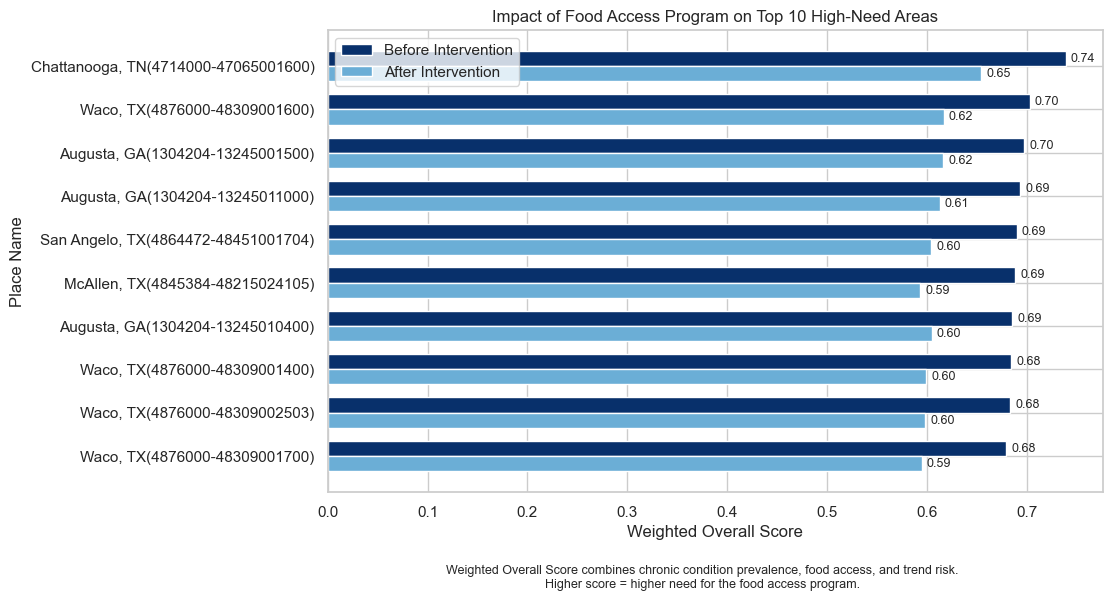

In [232]:
import numpy as np

impact_comparison = impact_comparison.sort_values('weighted_overall_score', ascending=True)

#Labels
labels = impact_comparison['PlaceName'] + ', ' + impact_comparison['State'] + '('+ impact_comparison['Place_TractID'] +')' 
y = np.arange(len(labels))

#Bar data
before_scores = impact_comparison['weighted_overall_score'].values
after_scores = impact_comparison['weighted_overall_score_improved'].values

#Colors + bar height
before_color = '#08306B'  
after_color = '#6BAED6'  
bar_height = 0.35

plt.figure(figsize=(10,6))

#Horizontal bars
plt.barh(y + bar_height/2, before_scores, color=before_color, height=bar_height, label='Before Intervention')
plt.barh(y - bar_height/2, after_scores, color=after_color, height=bar_height, label='After Intervention')

#Add score labels
for i in range(len(y)):
    plt.text(before_scores[i] + 0.005, y[i] + bar_height/2, f"{before_scores[i]:.2f}", va='center', fontsize=9)
    plt.text(after_scores[i] + 0.005, y[i] - bar_height/2, f"{after_scores[i]:.2f}", va='center', fontsize=9)
    
plt.yticks(y, labels)
plt.xlabel('Weighted Overall Score')
plt.ylabel('Place Name')
plt.title('Impact of Food Access Program on Top 10 High-Need Areas')
plt.legend()

#Caption
plt.figtext(0.5, -0.05,
            'Weighted Overall Score combines chronic condition prevalence, food access, and trend risk.\n'
            'Higher score = higher need for the food access program.', 
            ha='center', fontsize=9)

plt.show()